# Feature Reduction and Regularization: a brief theory

In the previous sections, we have seen that
the more complex a model is (and the less data we have), the more it will be prone to overfitting.

We have also seen that models that severely overfit the training sample, will not generalize well
to unseen data.

Finding the "sweat spot" in terms of model complexity lies in the heart of
predictive modelling. True machine learning models facilitates finding this sweat spot
with so-called hyperparamters that allow fine-tuning
different aspects of model complexity.

There are two basic methods to reduce model complexity:
- reducing the *number* of internal free parameters
that are optimised during model fitting.
- introducing a *penalty* for complex models during model fitting,
  that prefers if the model leaves many of its parameters unused (zero coefficient).

## Feature Reduction

Reducing the number of features naturally reduces model complexity.
In the next section we will see some of the most common strategies to do so.

This section provides some theoretical background that will be useful in the next section.

### Selecting best features based on their association with the target

A possible way of reducing the complexity of a model
is to simply retain those feature only, which seem to be correlated to the target in
the training set.

This can be done based on any conventional statistical inference method.
We can for example take (the absolute value of)
the Pearson's correlation coefficient:

$$
r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}
$$

In theory an arbitrary threshold can be drawn for the test statistic and
can be considered as a hyperparamter.
Changing it will change model complexity.

Higher thresholds -> less parameters -> lower complexity
Lower thershold -> more predictors -> higher complexity

In case of highly collinear (correlated) features, this approach may not be efficient in reducing
complexity, as it may retain too many features.

### Principal Component Analysis

A somewhat more sophisticated approach is to apply dimensionality reduction,
for instance principal component analysis (PCA).

As defined in [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis): PCA is defined as an orthogonal linear transformation that transforms
the data to a new coordinate system such that the greatest variance
by some scalar projection of the data comes to lie on the first coordinate
(called the first principal component),
the second-greatest variance on the second coordinate, and so on.

Loosely speaking, in case of correlated (collinear) features, PCA decomposes
the common component of the features into one single variable. PCA components will, therefore,
be orthogonal to each other.

Retaining the first k principal component will therefore ensure that as much
total variance is reatined from all features as possible and allows for low-complexity
models even in case of highly collinear features.

:::{figure-md} pca
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1024px-GaussianScatterPCA.svg.png" alt="fishy" width="400px">

*Principal Component Analysis in two dimensions (Source: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1024px-GaussianScatterPCA.svg.png), author: Nicoguaro, [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/))*.
:::

## Partial Least Squares

As compared to selecting the K best features and PCA,
[Partial Least Squares](https://en.wikipedia.org/wiki/Partial_least_squares_regression) (PLS) brings the best of both words.

Instead of finding hyperplanes of maximum variance between the response
and independent variables (as PCA does),
PLS finds a linear regression model by projecting the predicted
variables and the observable variables to a new space.

The order of PLS components does not simply reflect how much total variance they explain.
It reflects, how much variance they explain in the target variable.

PLS often achieves a comparable performance to PCA, but with fewer components included.

:::{note}
Importantly, PLS can be applied to predict multiple variables at the same time.
:::

## Regularization

Instead of "manually" selecting the number of features to include,
we can extend the linear regression model so that during minimization of the
error term it also considers an extra term, a penalty, which increases if the
model is complex.

Let's recall the following equation from [chapter 2](../2_linear_models/theory_linear_models.md):

$$
argmin_\boldsymbol{b} \sum [ \boldsymbol{y} - \boldsymbol{b}X) ]^2
$$

which is the term to be minimized when fitting the model.

To construct a regularized model, all we have to do is adding a penalty term $f$:

$$
argmin_\boldsymbol{b} \sum [ \boldsymbol{y} - \boldsymbol{b}X) ]^2 + \alpha f(\boldsymbol{b})
$$

where $f$ is a function of the model coefficinets $\boldsymbol{b}$ and \alpha is
the hyperparamter controlling the strength of regularization.

Different penalty terms allow a different kind if control over model complexity.
Here we will review the two most common regularized regression approaches, Ridge and Lasso.

### Ridge

In case of [Ridge regression](https://en.wikipedia.org/wiki/Ridge_regression) {cite:p}`hilt1977ridge`, the penalty term is
simply the square of the L2-norm of the model coefficients:

$$
f(\boldsymbol{b}) = ||\boldsymbol{b}||_2^2 = \sum_i b_i^2
$$

The larger the L2-norm of the model coefficients are,
the larger the penalty function will be.
Therefore, depending on the value of $\alpha, "slimmer" models with lower coefficients
will be preferred.

In other words, increasing alpha will pull the model coefficients towards zero and results in this:

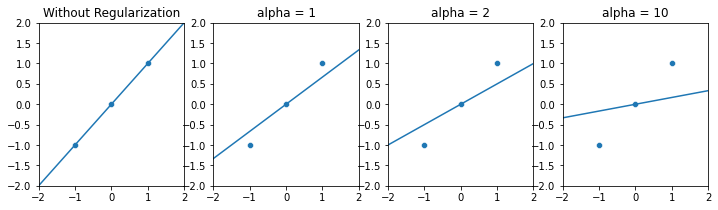

In [42]:
!pip install scikit-learn > /dev/null 2>&1
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
x=np.array([-1,0,1])
y=np.array([-1,0,1])

figure, axes = plt.subplots(1, 4, figsize=(12,3))
sns.scatterplot(x=x, y=y, ax=axes[0])
m, b = np.polyfit(x, y, 1)
axes[0].axline([0,0], [1, 1])
axes[0].set_title("Without Regularization")
axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2, 2)
sns.scatterplot(x=x, y=y, ax=axes[1])
m = Ridge(alpha=1).fit(y=y, X=np.array([x]).reshape(-1, 1))
axes[1].axline([0,0], [1,m.predict(np.array([1]).reshape(-1, 1))[0]])
axes[1].set_title("alpha = 1")
axes[1].set_xlim(-2, 2)
axes[1].set_ylim(-2, 2)
sns.scatterplot(x=x, y=y, ax=axes[2])
m = Ridge(alpha=2).fit(y=y, X=np.array([x]).reshape(-1, 1))
axes[2].axline([0,0], [1,m.predict(np.array([1]).reshape(-1, 1))[0]])
axes[2].set_title("alpha = 2")
axes[2].set_xlim(-2, 2)
axes[2].set_ylim(-2, 2)
sns.scatterplot(x=x, y=y, ax=axes[3])
m = Ridge(alpha=10).fit(y=y, X=np.array([x]).reshape(-1, 1))
axes[3].axline([0,0], [1,m.predict(np.array([1]).reshape(-1, 1))[0]])
axes[3].set_title("alpha = 10")
axes[3].set_xlim(-2, 2)
axes[3].set_ylim(-2, 2)
plt.show()

Models with high regularization will have more coefficients close to zero (almost ignored), which can be considered as a decrease in model complexity, without having to "manually" drop predictors.

In case of collinear features, Ridge regression tends to distribute the coefficients across the collinear group.

### LASSO

[LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)) {cite:p}`santosa1986linear, tibshirani1996regression` (least absolute shrinkage and selection operator) is a regularized linear model, similar to Ridge, with the difference that the penalty term is the L1-norm of the model coefficients, instead of the L2-norm.

$$
f(\boldsymbol{b}) = ||\boldsymbol{b}||_1 = \sum_i |b_i|
$$

Similarly to Ridge, the larger the L1-norm of the model coefficients are,
the larger the penalty function will be.
Therefore, depending on the value of $\alpha$, "slimmer" models with lower coefficients
will be preferred.

However, L1-regularization tends to completely zero out coefficients, instead of just pulling the towards zero.
Features receiving zero coefficient can be considered as dropped during model fit.
Therefore, LASSO performs an inherent variable selection.

In the previous mock-example, LASSO results in "more agressive" shrinkage.
Notice that with a high alpha, LASSO completely zeros out the single beta coefficient in the mock example and falls back to a ["mean-model"](../2_linear_models/practice_linear_models.ipynb).

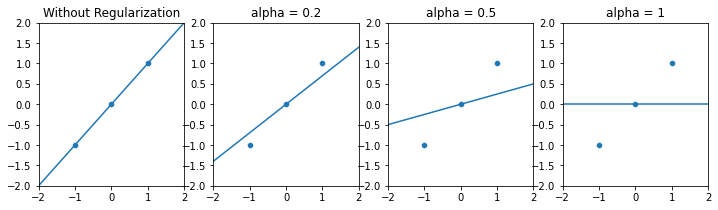

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Lasso
x=np.array([-1,0,1])
y=np.array([-1,0,1])

figure, axes = plt.subplots(1, 4, figsize=(12,3))
sns.scatterplot(x=x, y=y, ax=axes[0])
m, b = np.polyfit(x, y, 1)
axes[0].axline([0,0], [1, 1])
axes[0].set_title("Without Regularization")
axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2, 2)
sns.scatterplot(x=x, y=y, ax=axes[1])
m = Lasso(alpha=0.2).fit(y=y, X=np.array([x]).reshape(-1, 1))
axes[1].axline([0,0], [1,m.predict(np.array([1]).reshape(-1, 1))[0]])
axes[1].set_title("alpha = 0.2")
axes[1].set_xlim(-2, 2)
axes[1].set_ylim(-2, 2)
sns.scatterplot(x=x, y=y, ax=axes[2])
m = Lasso(alpha=0.5).fit(y=y, X=np.array([x]).reshape(-1, 1))
axes[2].axline([0,0], [1,m.predict(np.array([1]).reshape(-1, 1))[0]])
axes[2].set_title("alpha = 0.5")
axes[2].set_xlim(-2, 2)
axes[2].set_ylim(-2, 2)
sns.scatterplot(x=x, y=y, ax=axes[3])
m = Lasso(alpha=1).fit(y=y, X=np.array([x]).reshape(-1, 1))
axes[3].axline([0,0], [1,m.predict(np.array([1]).reshape(-1, 1))[0]])
axes[3].set_title("alpha = 1")
axes[3].set_xlim(-2, 2)
axes[3].set_ylim(-2, 2)
plt.show()

In the [next section](practice_regularization.ipynb), we see how these simple machine learning models can be applied with scikit-learn, and [then](leakage.ipynb) touch upon a common mistake which might make our model performance estimates overly optimistic.